# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Цель анализа: 
1. Изучите следующие параметры объектов: 
* общая площадь;
* жилая площадь;
* площадь кухни;
* цена объекта;
* количество комнат;
* высота потолков;
* этаж квартиры;
* тип этажа квартиры («первый», «последний», «другой»);
* общее количество этажей в доме;
* расстояние до центра города в метрах;
* расстояние до ближайшего аэропорта;
* расстояние до ближайшего парка;
* день и месяц публикации объявления.
* Постройте отдельные гистограммы для каждого из этих параметров.
2. Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 
* Постройте гистограмму.
* Посчитайте среднее и медиану.
* В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?
3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?
 Изучите, зависит ли цена от:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).
* Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.
4. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.
5. Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

### 1 Изучение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [4]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [7]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

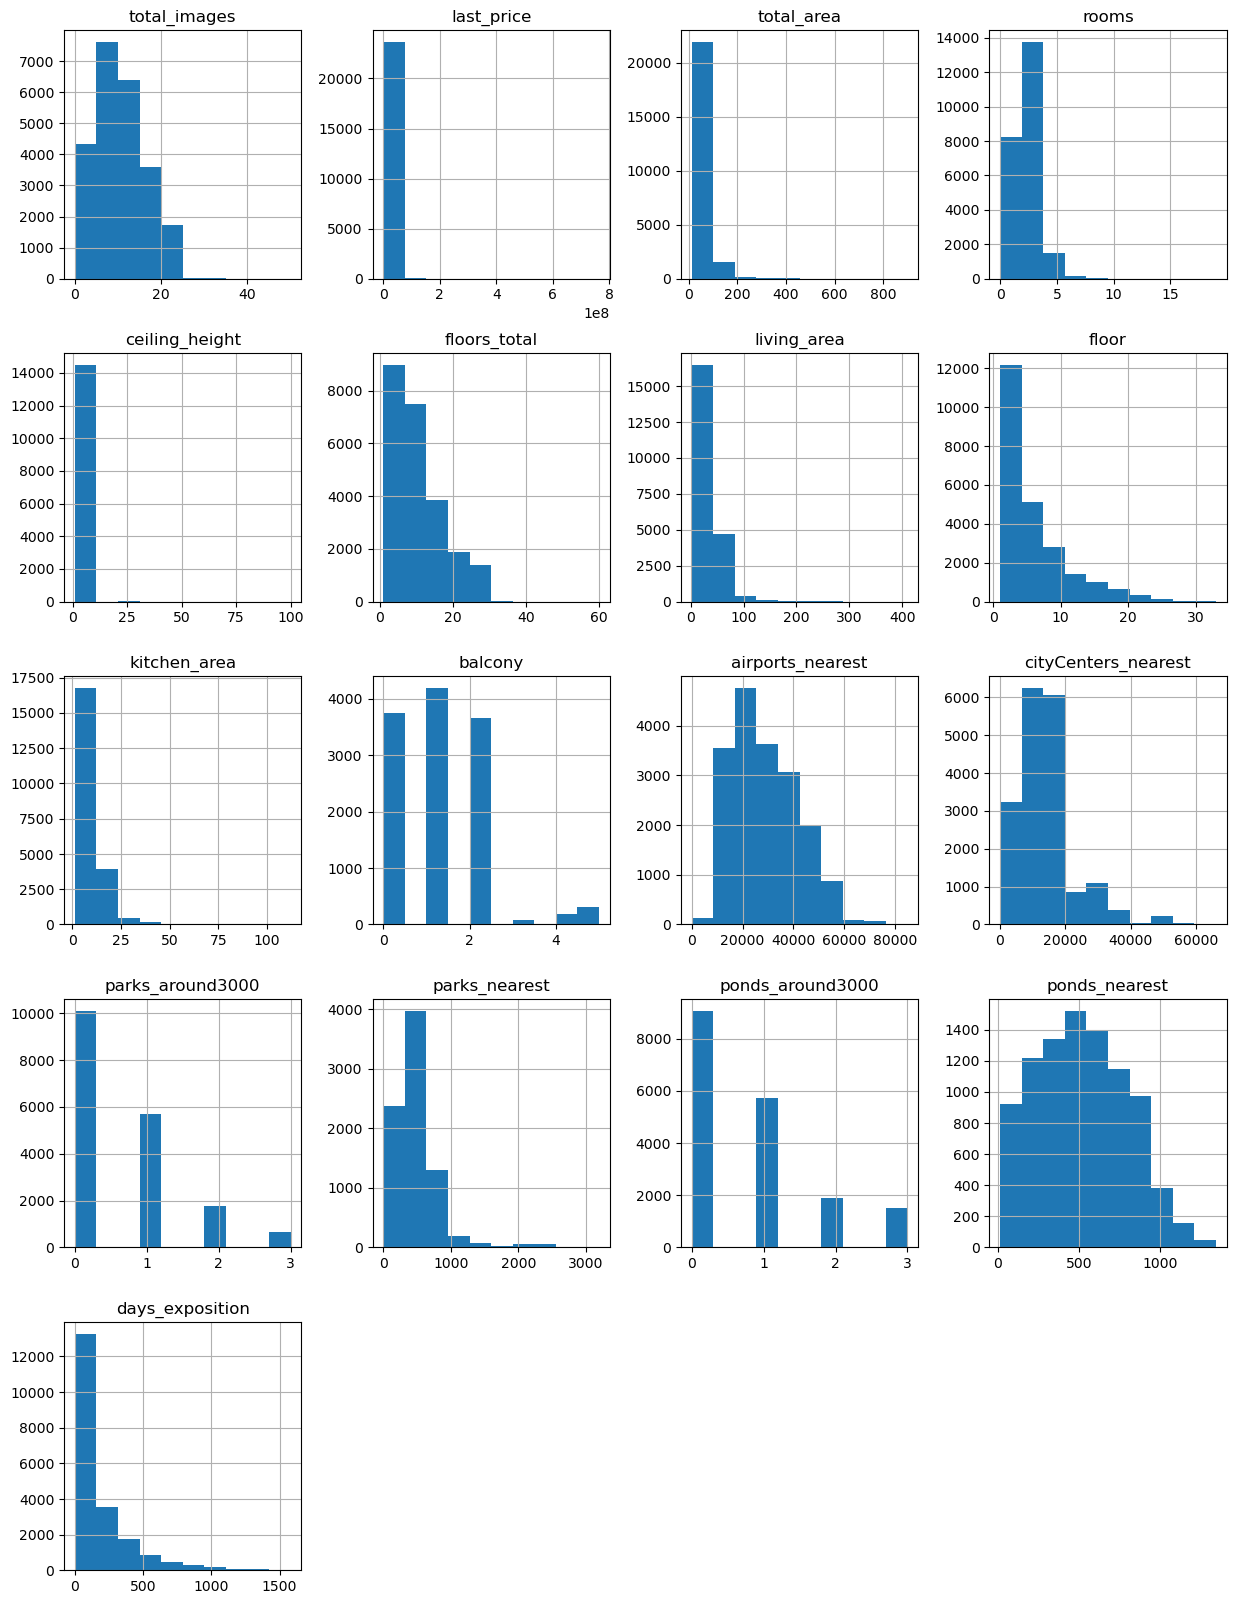

In [10]:
data.hist(figsize=(15,20))

### 2 Предобработка данных

In [12]:
#Заменим на змеиный регистр название столбца
data = data.rename(columns = {'cityCenters_nearest':'city_centers_nearest'})

In [13]:
#Все пропущеные значения в апартаментах заменяю на False.
data['is_apartment'] = data['is_apartment'].fillna(False)

In [14]:
#Сменим тип данных на datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [15]:
#Пропуски сменим на значение 10000. 
data['days_exposition'] = data['days_exposition'].fillna(10000).astype(int)

In [16]:
#Сменим пропуски балконов на значение 0
data['balcony'] = data['balcony'].fillna(0).astype(int)

In [17]:
#Заменим тип данных в последней выставленной цене на int
data['last_price'] = data['last_price'].astype(int)

In [18]:
#Заменим тип данных в кол-ве парков и прудов на int, заменяя пропущенные значения 0
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)

In [19]:
#Удалим незначительные количественно пропуски с количеством этажей(и приведем их к типу данных int) и пропущенные локации так же удалил
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'] = data['floors_total'].astype(int)

In [20]:
#Найдем часть неявных пропусков, которые в пределах моих идей и возможностей на данном этапе :) 
data['locality_name'] = data['locality_name'].str.lower().str.replace('ё', 'е')
data['locality_name']=data['locality_name'].str.replace('деревня|село|поселок|поселок городского типа|городской поселок|садоводческое некоммерческое товарищество|садовое товарищество|городского типа|при железнодорожной станции|станции|', '', regex=True).str.strip()

In [21]:
#Потолки с аномально высокими значениями исправим и заполним пропуски медианой
def ceil(ceils):
    if ceils > 10:
        return ceils / 10
    elif ceils < 1.5:
        return data['ceiling_height'].median()
    else:
        return ceils

data['ceiling_height'] = data['ceiling_height'].apply(ceil)

In [22]:
#Заменим медианой пустые значение жилой комнаты и площади кухни
living_area_proc = data['living_area'].median() / data['total_area'].median()
kitchen_area_proc = data['kitchen_area'].median() / data['total_area'].median()
data['living_area'].fillna(living_area_proc * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_area_proc * data['total_area'], inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int32         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [24]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition             0
dtype: int64

**Общий вывод по предобработке данных:**
* **cityCenters_nearest** для удобства сделал себе змеиный регистр
* **is_appartment** пропуски вероятнее всего из-за того, что люди просто не указали квартира или апартаменты, лично для меня вообще не существовало определения апартаменты таким, какое оно есть в действительности. Но люди которые продают апартаменты, точно это знают и указали, а остальное просто не указали этот параметр.
* **first_day_exposition** ну тут все понятно, изменил тип данных на datetime
* **days_exposition** я решил, что объявление еще не закрыто, поэтому присутствуют пропуски, и выставил просто высокое значение для этого параметра. Хотя не все так однозначно, может объявление не закрыл продавец. Да и наверное впринципе столбец не укажет точной даты продажи т.к не все день в день закроют свое объявление. Поэтому принял решение действовать пока что так.
* **balcony** скорее всего где пропуск, балкон отстутвует
* **last_price** сменил тип данных на инт
* **parks_around3000** данные не были заполнены, либо из-за того что их не указали, либо просто решили пропустить этот параметр
* **ponds_around3000** аналогично parks_around3000
* **floors_total** удалил невесомые пропуски, думаю никак не повлиют на результат
* **locality_name** аналогично floor_total удалил пропуски И здесь удалил немного неявных дупликатов. **UPD**
* **ceiling_height** Имеются аномальные значения высоты потолка, попытался как смог это исправить. Так же здесь пропуски, как я считаю, из-за того что многие решили не заполнять этот параметр. Хотя моя мама бы с ними бы из-за этого поспорила. Заполнил это все средними значениями относительно локаций. Это же Питер:), а там высота потолков сильно разница с высотой потолков в других локациях. Хотя далеко не точный способ, но все таки он ближе к правде если заполнить средним значениям не относительно локаций. **UPD** : Оставил пропуски как есть.
* **living_area** и **kitchen_area** тут как и многие были просто не заполнены, так как не каждый считает это обязательным.  Заполним это все медианым значением относительно общей площади
* **airports_nearest, city_centers_nearest** Не понимаю как это заполнить. Причины пропусков мне так же неясны, думаю это должно было заполняться автоматически. Хотя и то и то пытался заполнить относительно локации средним, но не совсем корректно наверно это, да и не получилось. Оставалось слишком много пропусков.
* **parks_nearest, ponds_nearest** тоже самое как и с парками, водоемами в радиусе 3км. Заполнять не стал

### 3 Расчет и добавление новых столбцов в таблицу

In [25]:
#Создадим новый столбец с ценой за квадратный метр
data['price_per_meter'] = data ['last_price'] / data['total_area']

In [26]:
#Создадим столбцы с днями публикации по дням месяцам и годам
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [27]:
#категоризируем этажи с помощью функции и добавим новый эти категории в новый столбец
def categorize_floor(row):
    floor = row['floor']
    if floor == row['floors_total']:
        return 'последний'
    if floor == 1:
        return 'первый'
    else:
        return 'другой'
        
data['floor_category'] = data.apply(categorize_floor, axis=1)

In [28]:
#создаем отдельный столбец с расстоянием до центра в километрах и переводим из метров в км. с округленными значениями
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

In [29]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,floor_category,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2,755.0,10000,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.600000,1,False,...,NaN,0,NaN,81,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.300000,4,False,...,90.0,2,574.0,558,92785.714286,3,8,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,NaN,14,91.730769,9,False,...,84.0,3,234.0,424,408176.100629,4,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,112.0,1,48.0,121,100000.000000,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.300000,3,False,...,796.0,3,381.0,10000,72490.845228,1,3,2017,другой,4.0
23695,14,3100000,59.00,2018-01-15,3,NaN,5,38.000000,4,False,...,NaN,0,NaN,45,52542.372881,0,1,2018,другой,NaN
23696,18,2500000,56.70,2018-02-11,2,NaN,3,29.700000,1,False,...,NaN,0,NaN,10000,44091.710758,6,2,2018,первый,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17,44.278846,12,False,...,173.0,3,196.0,602,149511.400651,1,3,2017,другой,10.0


### 4 Проведение исследовательского анализа данных

<AxesSubplot:>

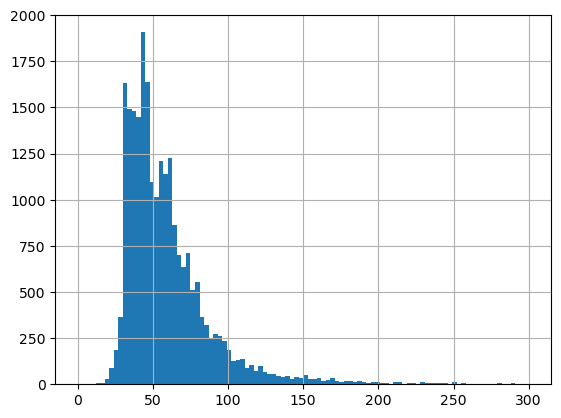

In [30]:
data['total_area'].hist(bins = 100, range = (0, 300))

<AxesSubplot:>

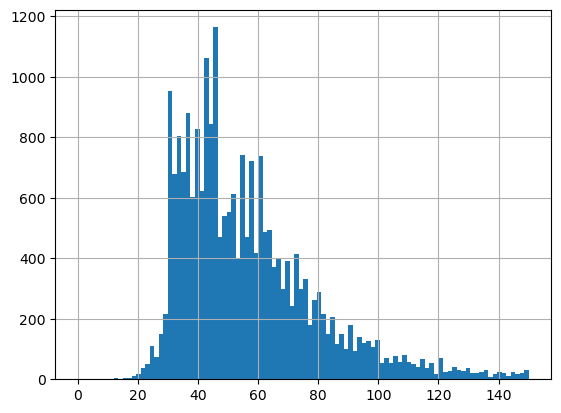

In [31]:
data['total_area'].hist(bins = 100, range = (0, 150))

In [32]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

*В общей площади распределение Гаусса, больше всего квартир от 30 до 70 кв м, есть вбросы до 900 кв м.. Среднее у нас 60 кв м, а медианное 52 кв м.*

<AxesSubplot:>

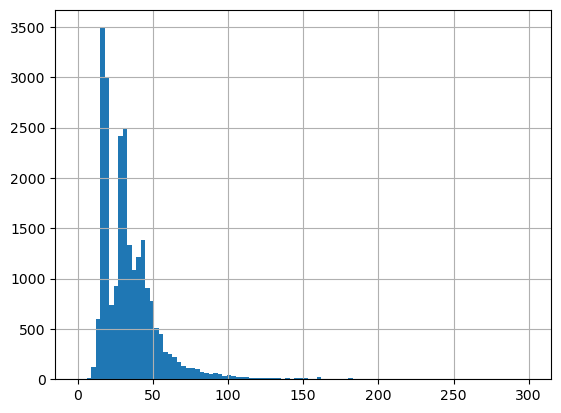

In [33]:
data['living_area'].hist(bins = 100 ,range = (0, 300))

<AxesSubplot:>

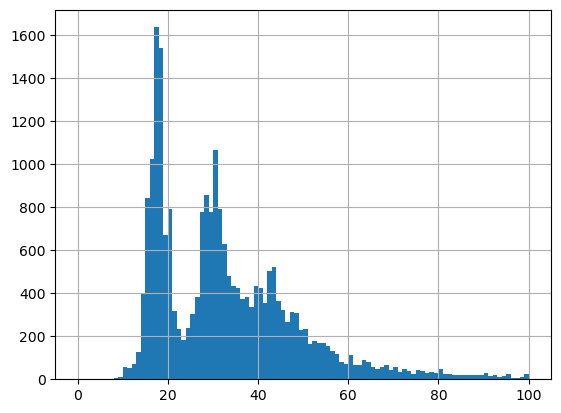

In [34]:
data['living_area'].hist(bins = 100 ,range = (0, 100))

In [35]:
data['living_area'].describe()

count    23565.000000
mean        34.621108
std         22.399827
min          2.000000
25%         19.000000
50%         30.000000
75%         42.115385
max        409.700000
Name: living_area, dtype: float64

*Так же распределение Гаусса, есть минимальное значение с 2 метрами и максимальное 409. Среднее 34 кв м, а медианное 30 кв*

<AxesSubplot:>

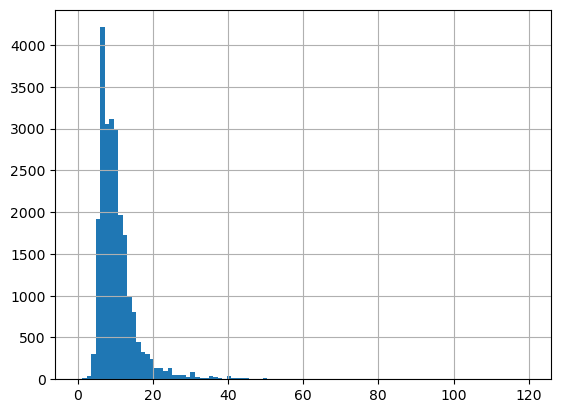

In [36]:
data['kitchen_area'].hist(bins = 100, grid=True, range = (0, 120))

<AxesSubplot:>

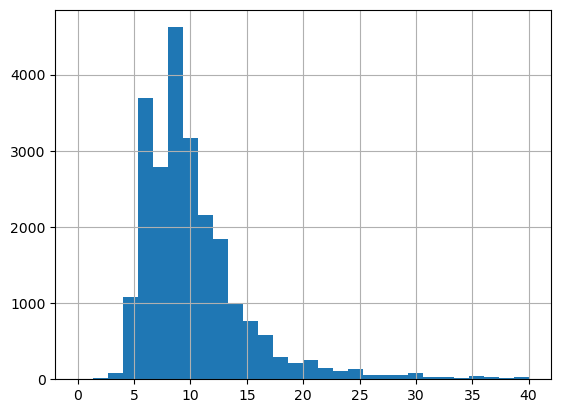

In [37]:
data['kitchen_area'].hist(bins = 30, grid=True, range = (0, 40))

In [38]:
data['kitchen_area'].describe()

count    23565.000000
mean        10.499499
std          6.037444
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

*Среднее 10 метров, медианное 9. Пик на 10 кв м.*

<AxesSubplot:>

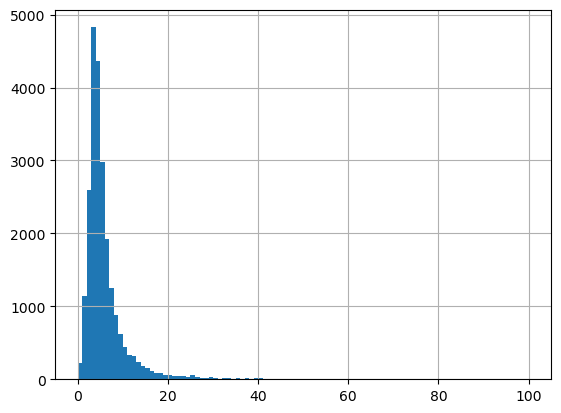

In [39]:
data['last_price_millions'] = data['last_price'] / 1000000
data['last_price_millions'].hist(bins = 100, range = (0,100))

<AxesSubplot:>

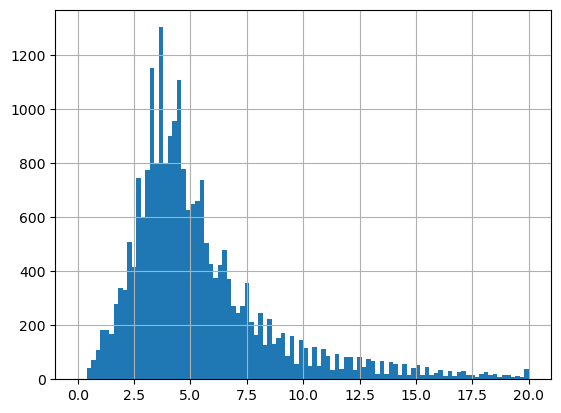

In [40]:
data['last_price_millions'].hist(bins = 100, range = (0,20))

In [41]:
data['last_price_millions'].describe()

count    23565.000000
mean         6.540058
std         10.910935
min          0.012190
25%          3.400000
50%          4.646000
75%          6.790000
max        763.000000
Name: last_price_millions, dtype: float64

*Так же есть выбросы, Большинство квартир продается от 2.5 до 6 млн, среднее 6 млн, медианное 4.6*

<AxesSubplot:>

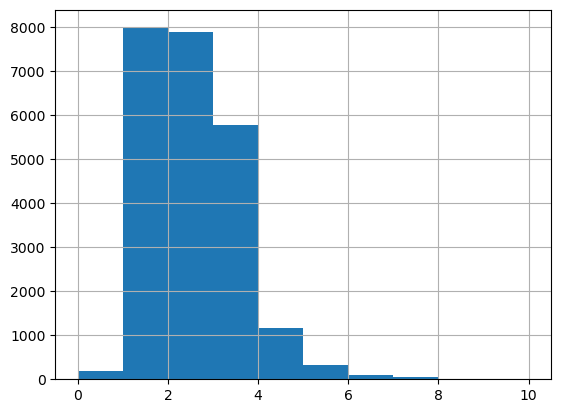

In [42]:
data['rooms'].hist(bins = 10, range = (0,10))

In [43]:
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

*Большинство квартир с 1-2 комнатами, чуть меньше с 3, с большим кол-вом сильно меньше квартир*

<AxesSubplot:>

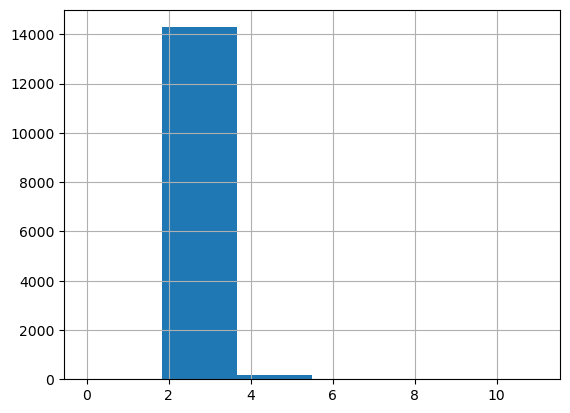

In [44]:
data['ceiling_height'].hist(bins = 6, range = (0, 11))

<AxesSubplot:>

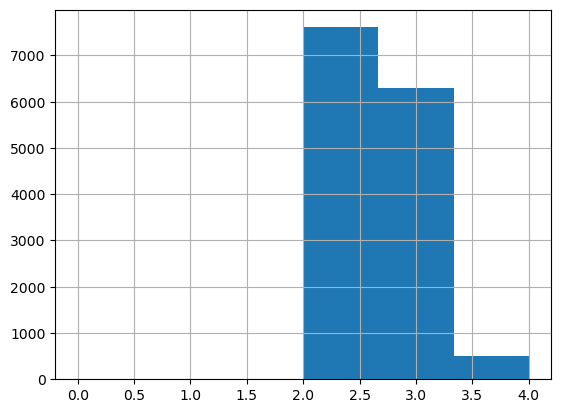

In [45]:
data['ceiling_height'].hist(bins = 6, range = (0, 4))

In [46]:
data['ceiling_height'].describe()

count    14481.000000
mean         2.728029
std          0.299132
min          1.030000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

*потолки в среднем высотой от 2ух до 3.3 метров*

<AxesSubplot:>

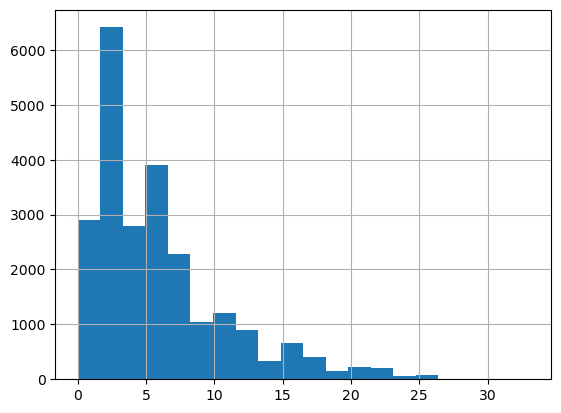

In [47]:
data['floor'].hist(bins = 20, range = (0, 33))

In [48]:
data['floor'].describe()

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

*самый популярный этаж это 3ий. Самые частые этажи проживание это с 1 по 7*

In [49]:
data['floor_category'].describe()

count      23565
unique         3
top       другой
freq       17326
Name: floor_category, dtype: object

*Большинство живет не на 1 и не на последнем этаже:)*

<AxesSubplot:>

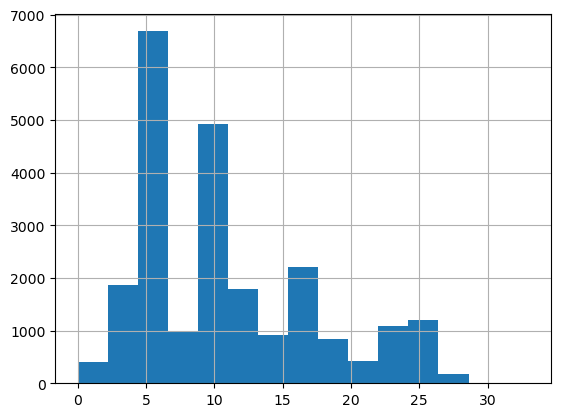

In [50]:
data['floors_total'].hist(bins = 15,range = (0, 33))

In [51]:
data['floors_total'].describe()

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

*Большинство домов это 5ти этажки и 9ти этажки*

<AxesSubplot:>

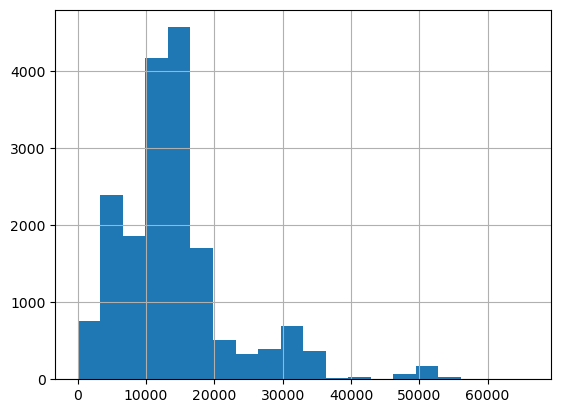

In [52]:
data['city_centers_nearest'].hist(bins = 20, range = (0, 66000))

In [53]:
data['city_centers_nearest'].describe()

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

*Большинство квартир продаются на расстоянии 10-15 км от центра*

<AxesSubplot:>

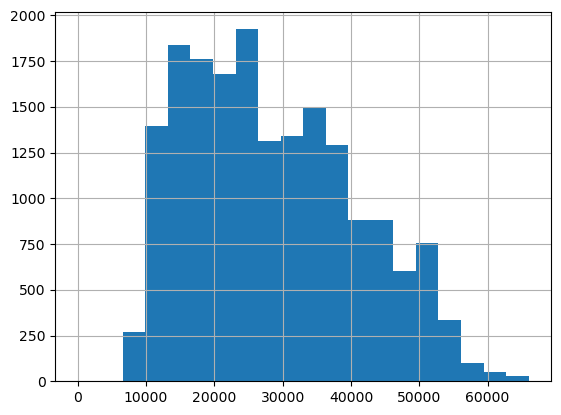

In [54]:
data['airports_nearest'].hist(bins = 20, range = (0, 66000))

In [55]:
data['airports_nearest'].describe()

count    18041.000000
mean     28797.082701
std      12632.499735
min          0.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

*Большинство квартир находятся от 10 до 40 км от аэропорта.*

<AxesSubplot:>

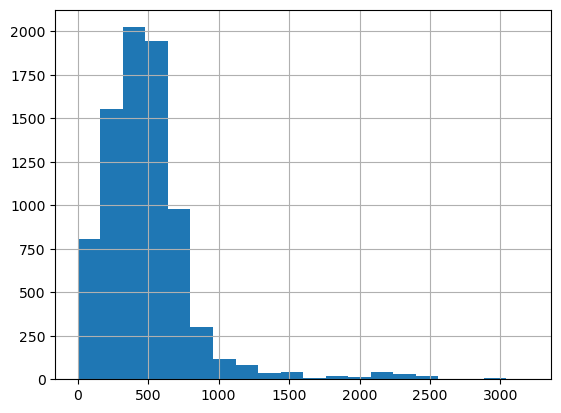

In [57]:
data['parks_nearest'].hist(bins = 20, range = (0, 3200))

In [58]:
data['parks_nearest'].describe()

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

*Большая часть квартир находится в 300-600 метрах от парка*

<AxesSubplot:>

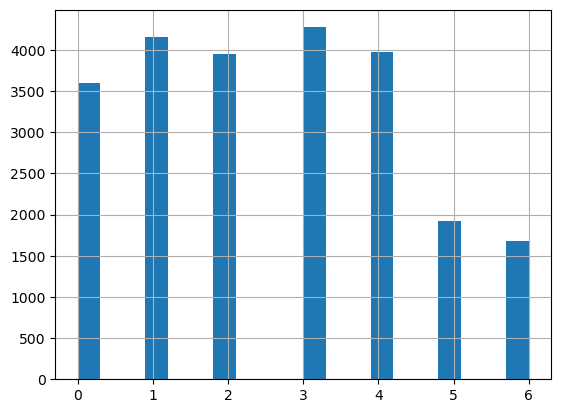

In [59]:
data['weekday'].hist(bins = 20, range = (0, 6))

<AxesSubplot:>

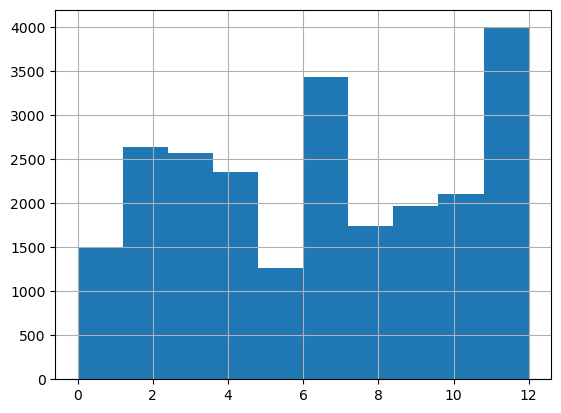

In [60]:
data['month'].hist(bins = 10, range = (0, 12))

In [61]:
data[data['days_exposition']!=10000]['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

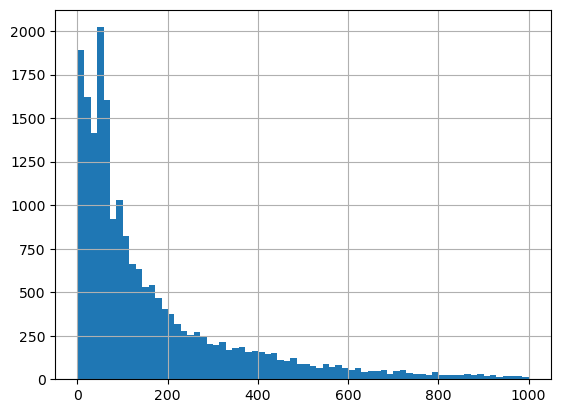

In [62]:
data['days_exposition'].hist(bins = 70, range = (1, 1000))

<AxesSubplot:>

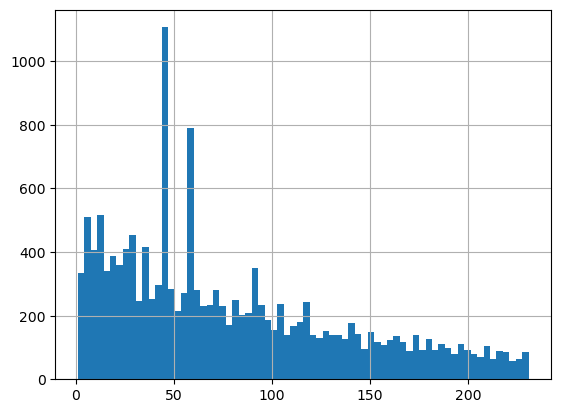

In [63]:
data['days_exposition'].hist(bins = 70, range = (1, 231))

(1.0, 1580.0)

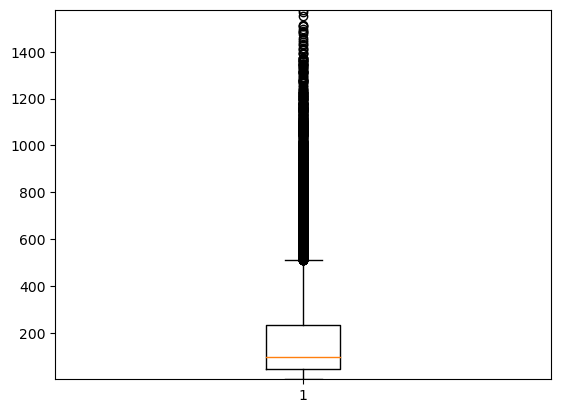

In [64]:
plt.boxplot(data[data['days_exposition']!=10000]['days_exposition'])
plt.ylim(1,1580)

*Квартиры чаще всего продаются в первые два месяца с момента выставления. Медианное значение 95 дней, а среднее 180. Есть аномалии и связаны вероятнее всего с автоматическим закрытием объявлений. Диаграма размаха с выбросами у нас начинается с 500~. Нормальная скорость продажи начинается с 1 дня, до 500*

In [65]:
data['days_exposition'].value_counts()

10000    3171
45        879
60        538
7         234
30        208
         ... 
964         1
1147        1
1228        1
1112        1
971         1
Name: days_exposition, Length: 1140, dtype: int64

*На 45 и 60 днях самые аномальные значения. Думаю действительно это автоматически снятые с продажи объявления*

0.6536213939252802

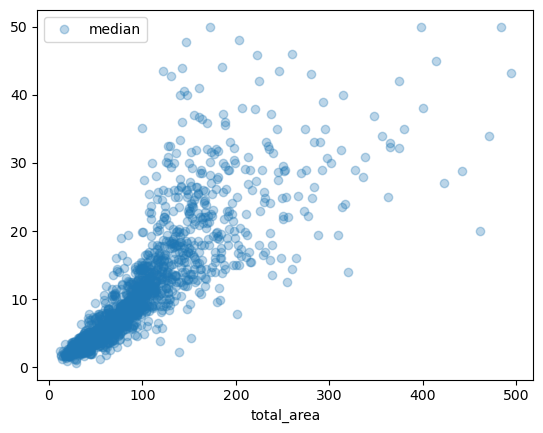

In [66]:
pivot_total_area = data.query('last_price_millions < 50').pivot_table(index = 'total_area', values = 'last_price_millions', aggfunc = 'median')
pivot_total_area.columns = ['median']
pivot_total_area.plot(y = 'median', style = 'o', alpha = 0.3)
data['total_area'].corr(data['last_price_millions'])

*Цена будет выше, если площадь будет больше.*

0.5857830307420003

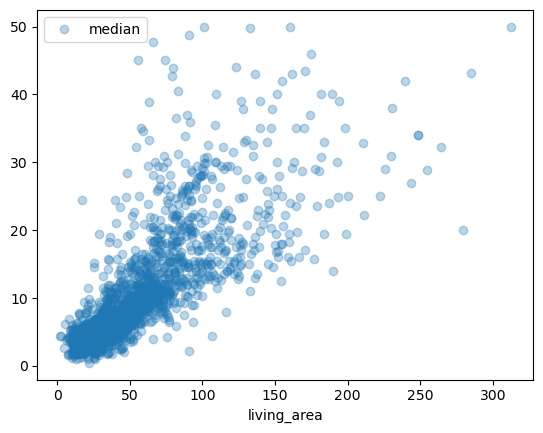

In [67]:
pivot_living_area = data.query('last_price_millions < 50').pivot_table(index = 'living_area', values = 'last_price_millions', aggfunc = 'median')
pivot_living_area.columns = ['median']
pivot_living_area.plot(y = 'median', style = 'o', alpha = 0.3)
data['living_area'].corr(data['last_price_millions'])

In [68]:
pivot_kitchen_area = data.query('last_price_millions < 50').pivot_table(index = 'kitchen_area', values = 'last_price_millions', aggfunc = 'median')
pivot_kitchen_area.columns = ['median']
data['kitchen_area'].corr(data['last_price_millions'])

0.5145127790596425

0.36319054850657484

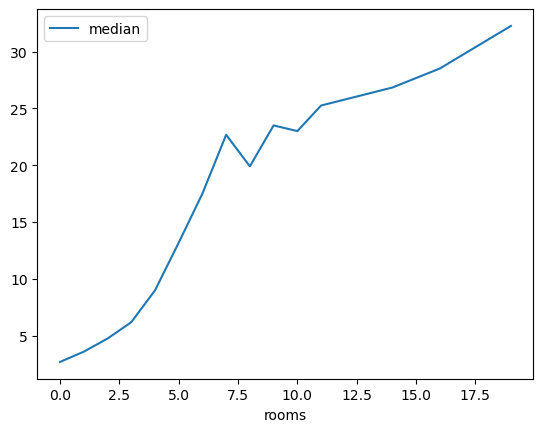

In [69]:
pivot_rooms = data.query('last_price_millions < 60').pivot_table(index = 'rooms', values = 'last_price_millions', aggfunc = 'median')
pivot_rooms.columns = ['median']
pivot_rooms.plot(y = 'median')
data['rooms'].corr(data['last_price_millions'])

*Чем больше комнат, тем выше цена и так продолжается до 7ми комнат*

<AxesSubplot:xlabel='floor_category'>

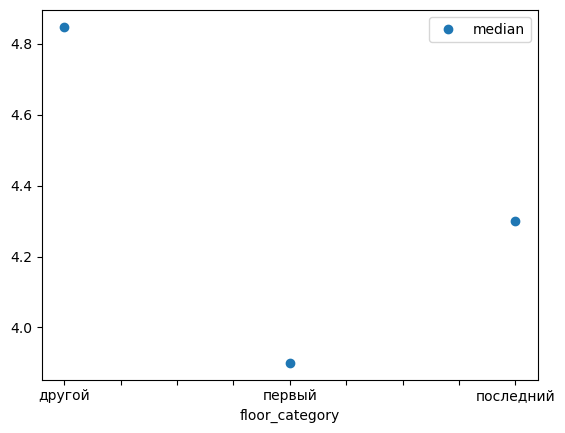

In [70]:
pivot_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price_millions', aggfunc = ['count', 'median'])
pivot_floor_category.columns = ['count', 'median']
pivot_floor_category.plot(y = 'median', style = 'o')

In [71]:
pivot_floor_category

,count,median
floor_category,,
другой,17326,4.8485
первый,2884,3.9000
последний,3355,4.3000


*Видим что не первый и не последний этаж дороже. Другой дороже первого на ~1 миллион, а последний дешевле другого на 550 тыс.*

<AxesSubplot:xlabel='weekday'>

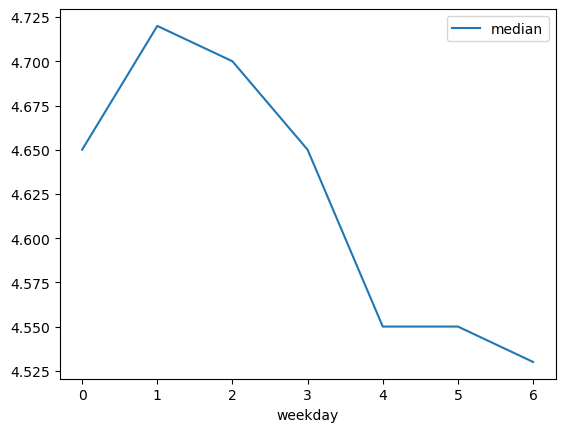

In [75]:
pivot_weekday = data.pivot_table(index = ['weekday'], values = 'last_price_millions', aggfunc = ['count', 'median'])
pivot_weekday.columns = ['count', 'median']
pivot_weekday.plot(y = 'median')

*люди выставляющие объявления во вторник, указывают стоимость выше, чем в остальные дни недели, а на выходные падает стоимость больше всего*

<AxesSubplot:xlabel='month'>

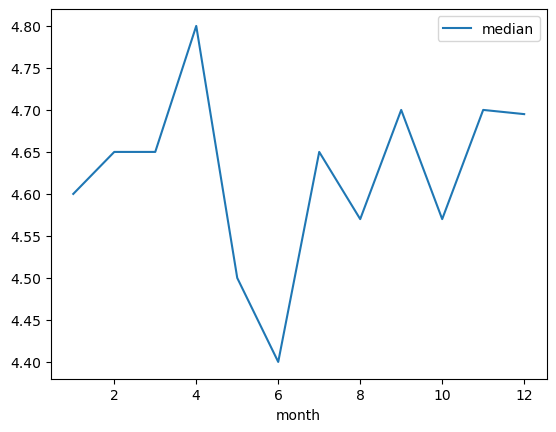

In [76]:
pivot_month = data.pivot_table(index = ['month'], values = 'last_price_millions', aggfunc = ['median', 'count'])
pivot_month.columns = ['median', 'count']
pivot_month.plot(y = 'median')

In [77]:
pivot_month

,median,count
month,,
1,4.600,1487
2,4.650,2636
3,4.650,2575
4,4.800,2356
5,4.500,1261
6,4.400,1747
7,4.650,1686
8,4.570,1739
9,4.700,1972


*в апреле самые высокие цены, в июле они падают примерно на 9%, а после идет рост.*

<AxesSubplot:xlabel='year'>

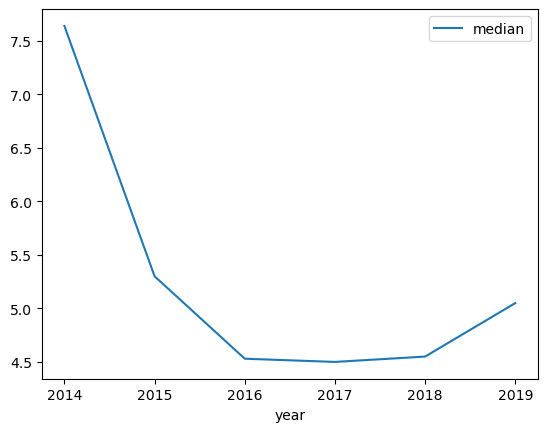

In [78]:
pivot_year = data.pivot_table(index = ['year'], values = 'last_price_millions', aggfunc = ['median', 'count'])
pivot_year.columns = ['median', 'count']
pivot_year.plot(y = 'median')

In [79]:
pivot_year

,median,count
year,,
2014,7.6400,136
2015,5.3005,1166
2016,4.5300,2745
2017,4.5000,8161
2018,4.5500,8486
2019,5.0500,2871


*тут мы видим как сильно упали цены на квартиры с 2014 года, цены стали ниже на 3 млн в 2016 и незначительно выросли к 2018, а с 2018 до 2019 выросли на 1 млн. Но на это полагаться не стоит, выгрузка за 2014 и 2015 год гораздо меньше последующих, возможно в 2014 выгрузка не по всем месяцам. Но что точно можно заметить, чем меньше объявлений тем выше цена*

In [80]:
locality_pivot = data.pivot_table(index = 'locality_name', values = 'price_per_meter', aggfunc = ('count', 'mean'))
locality_pivot.columns = ['count', 'mean']
locality_pivot = locality_pivot.sort_values('count', ascending = False).head(10)
locality_pivot

,count,mean
locality_name,,
санкт-петербург,15651,114868.877341
мурино,586,86041.116064
кудрово,470,95260.846171
шушары,439,78551.344545
всеволожск,398,68654.473986
пушкин,369,103125.819291
колпино,338,75424.579098
парголово,327,90175.913458
гатчина,307,68746.146763


*Самая высокая стоимость жилья в Санкт-Петербурге, а самая низкая в Выборге*

In [82]:
spb_pivot = data.query('locality_name == "санкт-петербург"').pivot_table(index = 'city_centers_nearest_km', values = 'price_per_meter', aggfunc = ['count','mean'])
spb_pivot.columns = ['count','mean']
spb_pivot

,count,mean
city_centers_nearest_km,,
0.0,27,245833.530289
1.0,192,177005.407676
2.0,310,157849.007329
3.0,348,121507.831586
4.0,688,133282.874761
5.0,915,140453.957043
6.0,618,151012.193621
7.0,420,156176.879664
8.0,594,125649.733020


*Чем ближе к центру тем цена за кв. м. становится выше. И судя по ценам центр находится в радиусе 7 км*

**Общий вывод:**
*Изучил датасет, произвел иследование и определить зависимость цены квартиры от различных факторов. Но изначально мы обработали пропущенные значения, заменили типы данных, нашли неявные дупликаты, а так же обработали аномалии. Добавили в таблицу новые столбцы(цена за кв. м., день, месяц, год публикации, тип этажа квартиры и расстояние в км до центра). Провели анализ данных по общей, жилой и кухонной площади, цены объекта, кол-ва комнат, высоты потолков, этажа квартиры, типа квартиры, общего кол-ва этажей в доме, расстояния до центра, аэропорта, парка и дни месяцы публикации* 
   * Произведенные иследования показали следующее:
   1. Что большиство квартир в выгрузке с общей площадью от 30 до 70 кв. м
   2. Большиство квартир с жилой площадью от ~17 до 42 кв. м
   3. Кухни были в основном площадью от 5 до 14 кв. м
   4. Стоимость квартир была от 2.5 до 6 млн
   5. Количество комнат в самых частых случаях было от 1 до 2, и чуть менее часто встречали квартиры с 3 комнатами
   6. Высота потолков была от 2 до 3.3 метров **UPD**
   7. Большинство квартир продавались с 1 по 7 этаж
   8. Большинство домов было с 5-ю и 9-ю этажами
   9. Больше всего квартир в выгрузке находились в 10-15 км от центра Санкт-Петербурга
   10. Квартиры в среднем находились в 10-40 км от аэропорта
   11. Парки в основном находились в полукилометре
   * Сроки продажи квартир:
   В данной выгрузке очень много аномалий и связаны как мне кажется с автоматическим закрытием объявлений на платформе. Очень много закрытых объявлений через 45 и 60 дней после выставления на продажу. Если все таки работать с такими данными то квартиры в среднем продаются в первые три месяца.
   * Зависимости цен:
   1. На цены влияет общая площадь, жилая площадь и площадь кухни. Чем больше площадь, тем выше цена.
   2. Количество комнат так же влияет на цену. Так же чем больше комнат, тем цена будет выше.
   3. На цену влияет так же и этаж. Дешевле всего продают квартиры на первом этаже, немного дороже квартиры на последнем. А квартиры находящиеся между ними будут дороже.
   4. В начале недели цены на квартиру будут выше, чем к концу, но незначительно.
   5. В начале лета квартиры будут дешевле, чем остальные месяца. Апрель самый дорогой месяц. В остальном есть некая стабильность.
   6. По годам тут сложнее определить, если смотреть исключительно на график, то можно сказать, что с 2014 года цены на жилье пошли на спад до 2018 года, а после начался рост. Но за 2014 слишком маленькая выгрузка и сделаем тут вывод, что с 2018 года цены на жилье начали расти.
   7. Из 10ки самых популярных локаций с самоый высокой средней ценой оказался Санкт-Петербург. А с самой низкой Выборг.
   8. Если брать радиус центра Санкт-Петербурга в 7км, то там цены будут выше, чем запределами этого радиуса. За пределами центра цены будут постепенно снижаться, в зависимости от удаления от центра.